<a href="https://colab.research.google.com/github/fluxus-dev/BitcoinCrawler/blob/master/cnn_age_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
import json
token = {"username":"fluxus","key":"576e8ad148f40172712c594bfc285e0a"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d abhikjha/utk-face-cropped

 95% 221M/232M [00:04<00:00, 55.0MB/s]
100% 232M/232M [00:04<00:00, 48.9MB/s]


In [10]:
! unzip utk-face-cropped.zip

  inflating: utkcropped/utkcropped/4_1_0_20170109191952579.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/4_1_0_20170109192031317.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/4_1_0_20170109192110040.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/4_1_0_20170109192248839.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/4_1_0_20170109192308345.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/4_1_0_20170109192357612.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/4_1_0_20170109192418427.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/4_1_0_20170109192424440.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/4_1_0_20170109192714731.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/4_1_0_20170109192742824.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/4_1_0_20170109192825550.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/4_1_0_20170109192828745.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/4_1_0_20170109192831145.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/4_1

In [0]:
import numpy as np
import pandas as pd
import os

In [12]:
files = os.listdir("utkcropped/utkcropped/")
size = len(files)
print(size)

23709


In [0]:
import cv2

In [0]:
images = []
ages = []

for file in files:
  image = cv2.imread("utkcropped/utkcropped/"+file,0)
  image = cv2.resize(image,dsize=(64,64))
  image = image.reshape((image.shape[0],image.shape[1], 1))
  images.append(image)
  split_var = file.split('_')
  ages.append(split_var[0])

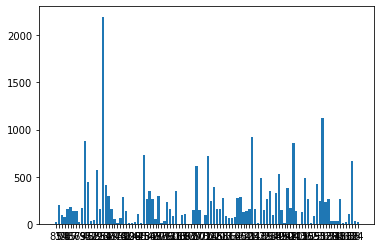

In [17]:
import matplotlib.pyplot as plt

x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages, y_ages)
plt.show()


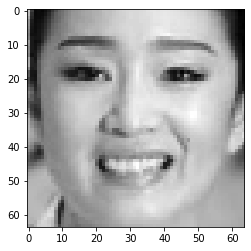

35
[[[166]
  [ 61]
  [ 19]
  ...
  [ 22]
  [ 12]
  [ 15]]

 [[158]
  [ 49]
  [ 19]
  ...
  [ 27]
  [ 15]
  [ 16]]

 [[144]
  [ 44]
  [ 20]
  ...
  [ 29]
  [ 17]
  [ 17]]

 ...

 [[157]
  [154]
  [158]
  ...
  [148]
  [146]
  [146]]

 [[154]
  [154]
  [152]
  ...
  [148]
  [146]
  [146]]

 [[136]
  [134]
  [154]
  ...
  [147]
  [145]
  [145]]]


In [21]:
def display(img):
  plt.imshow(img[:,:,0])
  plt.set_cmap('gray')
  plt.show()
idx = 500
sample = images[idx]
display(sample)
print(ages[idx])
print(sample)

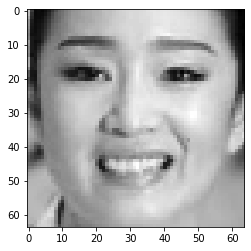

[[[0.6509804 ]
  [0.23921569]
  [0.07450981]
  ...
  [0.08627451]
  [0.04705882]
  [0.05882353]]

 [[0.61960787]
  [0.19215687]
  [0.07450981]
  ...
  [0.10588235]
  [0.05882353]
  [0.0627451 ]]

 [[0.5647059 ]
  [0.17254902]
  [0.07843138]
  ...
  [0.11372549]
  [0.06666667]
  [0.06666667]]

 ...

 [[0.6156863 ]
  [0.6039216 ]
  [0.61960787]
  ...
  [0.5803922 ]
  [0.57254905]
  [0.57254905]]

 [[0.6039216 ]
  [0.6039216 ]
  [0.59607846]
  ...
  [0.5803922 ]
  [0.57254905]
  [0.57254905]]

 [[0.53333336]
  [0.5254902 ]
  [0.6039216 ]
  ...
  [0.5764706 ]
  [0.5686275 ]
  [0.5686275 ]]]


In [24]:
features = np.zeros((size, sample.shape[0], sample.shape[1], 1), dtype ='float32')
label = np.zeros((size,1),dtype='float32')
for i in range(size):
  features[i] = images[i]
  label[i] = ages[i]
features = features/255
display(features[500])
print(features[500])


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2 )

In [0]:
import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten